In [1]:
import numpy as np
import pandas as pd
import rdkit as rd

DATA_PATH = 'IC50.csv'

df = pd.read_csv(DATA_PATH, sep=';')

df['Molecule ChEMBL ID'] = df['Molecule ChEMBL ID'].apply(lambda x: str(x.strip())).astype(str)

df.set_index('Molecule ChEMBL ID', inplace=True)

df.head()

,Molecule Name,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Value,Standard Units,pChEMBL Value,Potential Duplicate,BAO Label
Molecule ChEMBL ID,,,,,,,,,,,,
CHEMBL1862892,NaN,424.59,0,17258.0,DNDI1462990,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,IC50,7.0,nM,42217.0,False,organism-based format
CHEMBL1863122,NaN,414.48,0,44412.0,DNDI1468002,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,IC50,44339.0,nM,23193.0,False,organism-based format
CHEMBL1862791,NaN,337.39,0,47209.0,DNDI1388141,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,IC50,44258.0,nM,17746.0,False,organism-based format
CHEMBL1862928,NaN,414.51,0,35827.0,DNDI1576382,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,IC50,260.5,nM,21337.0,False,organism-based format
CHEMBL1862833,NaN,476.45,0,27851.0,DNDI1449749,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,IC50,290.0,nM,19876.0,False,organism-based format


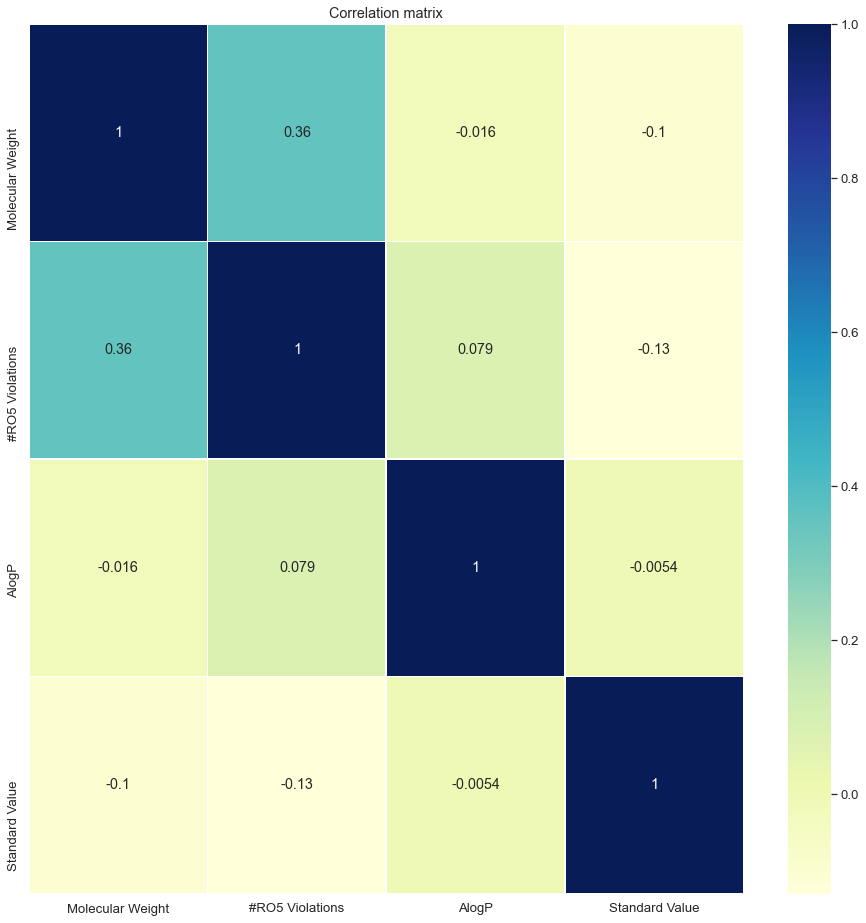

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

list = ['Molecular Weight', '#RO5 Violations', 'AlogP', 'Standard Value']

plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(df[list].corr(), 
            annot=True, linewidths=.5, cmap='YlGnBu')

plt.title('Correlation matrix');

In [3]:
values = df[list].drop('Standard Value', axis=1)
target = df['Standard Value']

values

,Molecular Weight,#RO5 Violations,AlogP
Molecule ChEMBL ID,,,
CHEMBL1862892,424.59,0,17258.0
CHEMBL1863122,414.48,0,44412.0
CHEMBL1862791,337.39,0,47209.0
CHEMBL1862928,414.51,0,35827.0
CHEMBL1862833,476.45,0,27851.0
...,...,...,...
CHEMBL1863448,348.41,1,13271.0
CHEMBL1862853,435.37,1,18050.0
CHEMBL1862957,386.32,1,44233.0


In [4]:
target

Molecule ChEMBL ID
CHEMBL1862892         7.0
CHEMBL1863122     44339.0
CHEMBL1862791     44258.0
CHEMBL1862928       260.5
CHEMBL1862833       290.0
                   ...   
CHEMBL1863448       110.0
CHEMBL1862853     11610.0
CHEMBL1862957     54720.0
CHEMBL1863230     59740.0
CHEMBL1862861    100000.0
Name: Standard Value, Length: 1580, dtype: float64

In [5]:
values.describe()

,Molecular Weight,#RO5 Violations,AlogP
count,1580.000000,1580.000000,1580.000000
mean,394.110222,0.206329,29480.303975
std,61.064352,0.432042,11382.727010
min,150.180000,0.000000,0.640000
25%,355.830000,0.000000,19756.000000
50%,401.940000,0.000000,29342.000000
75%,436.480000,0.000000,42468.500000
max,576.000000,2.000000,47209.000000


In [6]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, f1_score
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.25)

#rf_model = RandomForestRegressor()
#rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=150, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

#result = VotingRegressor([('rf_model', rf_model), ('gb_model', gb_model)])

#rf_model.fit(X_result, y_result)

GradientBoostingRegressor(max_depth=6, n_estimators=150, random_state=42)

In [7]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          #'\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) #+
          #'\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(16, 6))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

Train:	R2 = 0.224
Test:	R2 = -0.939


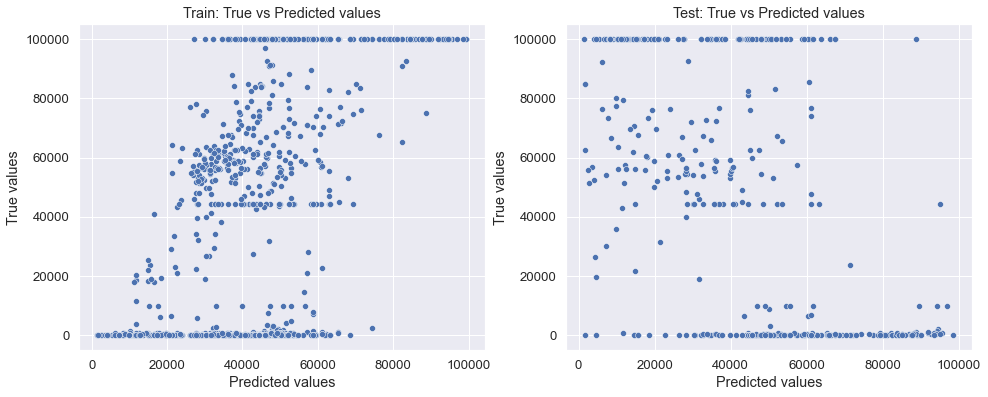

In [8]:
from sklearn.metrics import r2_score, mean_absolute_error

y_train_preds = gb_model.predict(X_train)
y_test_preds = gb_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [9]:
from rdkit import Chem
from rdkit.Chem import Descriptors

smiles = df['Smiles']
mols = [Chem.MolFromSmiles(s) for s in smiles]

toxic_df = pd.DataFrame()

toxic_df['Smiles'] = smiles
toxic_df['MolLog'] = [Descriptors.MolLogP(m) for m in mols]
toxic_df['TPSA'] = [Descriptors.TPSA(m) for m in mols]
toxic_df['NHOHCount'] = [Descriptors.NHOHCount(m) for m in mols]
toxic_df['NOCount'] = [Descriptors.NOCount(m) for m in mols]
toxic_df['NumHAcceptors'] = [Descriptors.NumHAcceptors(m) for m in mols]
toxic_df['NumHDonors'] = [Descriptors.NumHDonors(m) for m in mols]
toxic_df['NumRotatableBonds'] = [Descriptors.NumRotatableBonds(m)  for m in mols]
toxic_df['CalcNumAmideBonds'] = [Chem.rdMolDescriptors.CalcNumAmideBonds(m)  for m in mols]
toxic_df['NumHeteroatoms'] = [Descriptors.NumHeteroatoms(m) for m in mols]
toxic_df['NumValenceElectrons'] = [Descriptors.NumValenceElectrons(m) for m in mols]
toxic_df['NumSpiroAtoms'] = [Chem.rdMolDescriptors.CalcNumSpiroAtoms(m) for m in mols]
toxic_df['FractionCSP3'] = [Descriptors.FractionCSP3(m) for m in mols]
toxic_df['FpDensityMorgan1'] = [Descriptors.FpDensityMorgan1(m) for m in mols]
toxic_df['ExactMolWt'] = [Descriptors.ExactMolWt(m) for m in mols]
toxic_df['Chi0'] = [Descriptors.Chi0(m) for m in mols]
toxic_df['Chi1'] = [Descriptors.Chi1(m) for m in mols]
toxic_df['Ipc'] = [Descriptors.Ipc(m) for m in mols]
toxic_df['BertzCT'] = [Descriptors.BertzCT(m) for m in mols]
toxic_df['LabuteASA'] = [Descriptors.LabuteASA(m) for m in mols]
toxic_df['IC50'] = df['Standard Value']

toxic_df

,Smiles,MolLog,TPSA,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumRotatableBonds,CalcNumAmideBonds,NumHeteroatoms,...,NumSpiroAtoms,FractionCSP3,FpDensityMorgan1,ExactMolWt,Chi0,Chi1,Ipc,BertzCT,LabuteASA,IC50
Molecule ChEMBL ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL1862892,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,4.47400,57.70,1,6,4,1,8,2,6,...,0,0.520000,1.129032,424.283826,22.216968,15.011570,9.643864e+06,798.031521,186.156101,7.0
CHEMBL1863122,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,4.07618,69.02,1,5,4,1,5,1,6,...,0,0.240000,1.064516,414.185590,21.631181,15.152198,1.508329e+07,1070.681061,180.708278,44339.0
CHEMBL1862791,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,4.29210,42.35,1,3,3,1,5,0,4,...,0,0.190476,0.960000,337.147807,17.863597,12.013892,5.020377e+05,834.029603,146.298322,44258.0
CHEMBL1862928,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,2.97900,86.84,1,7,6,1,5,1,7,...,0,0.333333,1.193548,414.216809,21.794318,15.046045,1.525484e+07,1056.007355,181.879861,260.5
CHEMBL1862833,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,4.75740,58.12,1,5,4,1,5,1,10,...,0,0.291667,1.029412,476.163552,24.294318,16.219365,4.003149e+07,1130.350296,192.197488,290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL1863448,FC(F)(F)c1ccc(C(NCC2CCCCC2)c2cccnc2)cc1,5.35970,24.92,1,2,2,1,5,0,5,...,0,0.450000,1.000000,348.181333,17.700460,12.037825,5.321687e+05,646.891525,146.033262,110.0
CHEMBL1862853,OC(c1ccc(C(F)(F)F)cc1)(c1ccc(C(F)(F)F)cc1)c1cc...,6.48970,36.02,2,2,1,2,3,0,8,...,0,0.130435,0.580645,435.105783,22.440947,14.492185,8.541192e+06,1113.529587,172.318689,11610.0
CHEMBL1862957,CCCCc1ccc(C(O)(c2ccc(Cl)cc2)c2ccc(Cl)cc2)cn1,6.01520,33.12,1,2,2,1,6,0,4,...,0,0.227273,0.807692,385.100020,18.570703,12.535060,8.507005e+05,797.320542,163.990716,54720.0


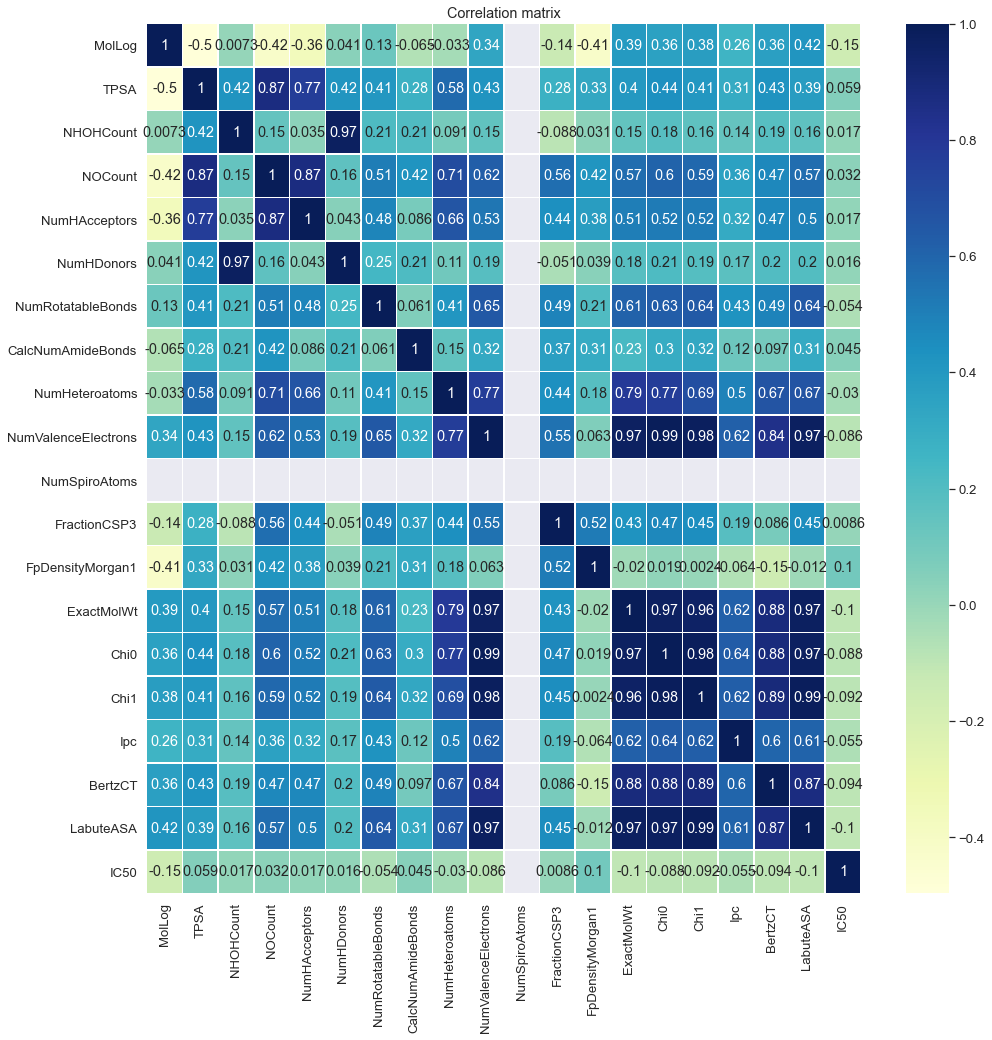

In [10]:
plt.figure(figsize = (16,16))

sns.set(font_scale=1.2)
sns.heatmap(toxic_df.corr(), 
            annot=True, linewidths=.5, cmap='YlGnBu')

plt.title('Correlation matrix');

In [11]:
values = toxic_df.drop(['Smiles','IC50'], axis=1)
target = toxic_df['IC50']

X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.10)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Train:	R2 = 0.167
Test:	R2 = -1.267


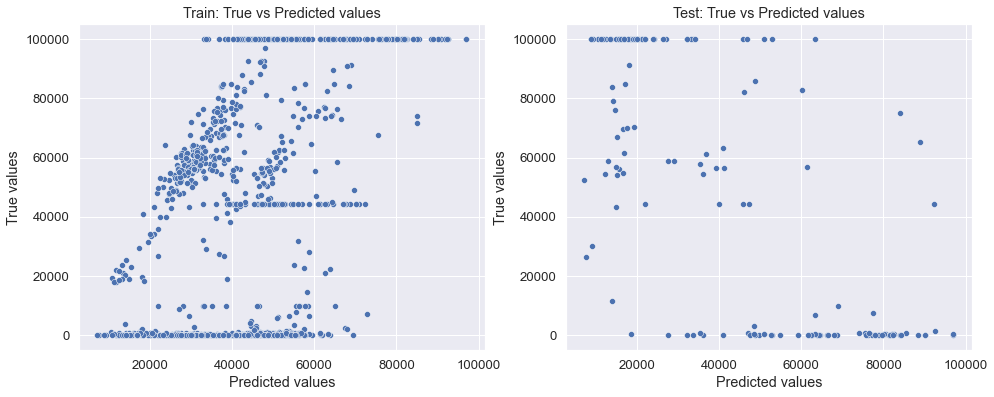

In [12]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [13]:
rf_model.feature_importances_

array([0.15819603, 0.06188713, 0.01011148, 0.01273662, 0.01738902,
       0.00918699, 0.0242627 , 0.01421941, 0.02961271, 0.02343748,
       0.        , 0.06173221, 0.11678508, 0.06729466, 0.03782942,
       0.05982503, 0.12929756, 0.09022356, 0.07597291])

In [14]:
toxic_df.describe()

,MolLog,TPSA,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumRotatableBonds,CalcNumAmideBonds,NumHeteroatoms,NumValenceElectrons,NumSpiroAtoms,FractionCSP3,FpDensityMorgan1,ExactMolWt,Chi0,Chi1,Ipc,BertzCT,LabuteASA,IC50
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1.580000e+03,1580.000000,1580.000000,1580.000000
mean,4.147217,54.198703,0.905063,4.466456,3.839873,0.882278,4.586709,0.541772,6.868987,143.291139,0.0,0.286337,1.037313,393.496161,19.534378,13.202261,9.632442e+06,881.867927,163.617709,44014.267476
std,0.987513,19.140173,0.624474,1.509359,1.172432,0.569492,1.216084,0.660207,2.023591,24.831160,0.0,0.138704,0.140507,61.114421,3.189862,2.140998,1.816303e+07,173.572238,24.280505,42368.807228
min,0.640600,12.890000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,2.000000,58.000000,0.0,0.000000,0.571429,150.079313,8.104448,5.342535,3.801758e+02,243.528788,65.708784,1.903000
25%,3.483500,41.490000,1.000000,3.000000,3.000000,1.000000,4.000000,0.000000,5.000000,128.000000,0.0,0.190476,0.947368,355.108754,17.700460,11.814534,4.061211e+05,774.605298,147.032427,200.000000
50%,4.158300,54.880000,1.000000,5.000000,4.000000,1.000000,5.000000,0.000000,7.000000,148.000000,0.0,0.291667,1.037037,401.192622,20.148054,13.562098,2.514903e+06,878.427481,167.824937,44341.000000
75%,4.813500,66.400000,1.000000,6.000000,5.000000,1.000000,5.000000,1.000000,8.000000,162.000000,0.0,0.388889,1.137931,436.208611,21.846724,14.914835,1.144626e+07,1014.735671,182.698624,100000.000000
max,6.808500,185.640000,4.000000,12.000000,8.000000,4.000000,9.000000,5.000000,15.000000,208.000000,0.0,0.705882,1.636364,575.114056,28.672998,17.834931,2.254317e+08,1290.311034,224.047882,100000.000000


In [15]:
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem, DataStructs

def FindSimilar(smiles):
    res = []
    mol = Chem.MolFromSmiles(smiles)
    smilesList = df['Smiles']
    fp_mol = FingerprintMols.FingerprintMol(mol)
    for smilesInDB in smilesList:
        mol_item = Chem.MolFromSmiles(smilesInDB)
        fp_item = FingerprintMols.FingerprintMol(mol_item)
        similarity = DataStructs.FingerprintSimilarity(fp_mol, fp_item)
        if similarity >= 0.9:
            res.append(smilesInDB)
    return res

In [16]:
df['Smiles'][3]

'Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2)nn1C'

In [17]:
new_df = FindSimilar(df['Smiles'][1579])
new_df

['CC(C)CS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CC(C)CS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CC(C)S(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CCS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CCS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CC(C)S(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1',
 'CS(=O)(=O)N1CCC(NC(c2cnccn2)c2ccc(F)cc2F)CC1']

In [18]:
snd_df = pd.read_csv('IC502.csv', sep=';')
snd_df.drop('split',inplace=True, axis=1)
snd_df.rename(columns = {'smiles':'Smiles', 'Activity': 'IC50'}, inplace=True)
snd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Smiles  1792 non-null   object 
 1   IC50    1792 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.1+ KB


In [19]:
features = ['Smiles', 'IC50']
fst_df = toxic_df[features]
result = pd.concat([fst_df,snd_df], ignore_index=True)
result

,Smiles,IC50
0,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,7.000
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,44339.000
2,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,44258.000
3,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,260.500
4,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,290.000
...,...,...
3367,OCC1=CC=C(C(=C1)[N](=O)=O)[N](=O)=O,4.090
3368,CC(CC=C)\C=C(C)/C=O,3.080
3369,CCC(CO)C1=CC=CC=C1,2.890
3370,CC(C)(C)C(N)CO,2.282


In [20]:
result.drop_duplicates(subset=['Smiles'],ignore_index=True, keep='first', inplace=True)
result

,Smiles,IC50
0,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,7.000
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,44339.000
2,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,44258.000
3,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,260.500
4,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,290.000
...,...,...
2528,OCC1=CC=C(C(=C1)[N](=O)=O)[N](=O)=O,4.090
2529,CC(CC=C)\C=C(C)/C=O,3.080
2530,CCC(CO)C1=CC=CC=C1,2.890
2531,CC(C)(C)C(N)CO,2.282


In [21]:
result['Smiles'][100]

'N#Cc1cccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)c1'

In [22]:
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem, DataStructs

def FindSimilar(smiles):
    res = []
    mol = Chem.MolFromSmiles(smiles)
    smilesList = result['Smiles']
    fp_mol = FingerprintMols.FingerprintMol(mol)
    for smilesInDB in smilesList:
        mol_item = Chem.MolFromSmiles(smilesInDB)
        fp_item = FingerprintMols.FingerprintMol(mol_item)
        similarity = DataStructs.FingerprintSimilarity(fp_mol, fp_item)
        if similarity >= 0.9:
            res.append(smilesInDB)
    return res

In [23]:
new_df = FindSimilar(result['Smiles'][100])
new_df

['N#Cc1cc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)ccc1F',
 'N#Cc1cccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)c1',
 'NC(=O)c1cccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)c1',
 'Fc1ccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)cc1',
 'Fc1cc(Cl)ccc1C(NC1CCN(c2ccc(Cl)cc2)CC1)c1cccnc1']

In [24]:
def get_chem_info(smiles):
    toxic_db = pd.DataFrame()
    mols = [Chem.MolFromSmiles(s) for s in smiles] 
    
    toxic_db['Smiles'] = smiles
    toxic_db['MolLog'] = [Descriptors.MolLogP(m) for m in mols]
    toxic_db['TPSA'] = [Descriptors.TPSA(m) for m in mols]
    toxic_db['NHOHCount'] = [Descriptors.NHOHCount(m) for m in mols]
    toxic_db['NOCount'] = [Descriptors.NOCount(m) for m in mols]
    toxic_db['NumHAcceptors'] = [Descriptors.NumHAcceptors(m) for m in mols]
    toxic_db['NumHDonors'] = [Descriptors.NumHDonors(m) for m in mols]
    toxic_db['NumRotatableBonds'] = [Descriptors.NumRotatableBonds(m)  for m in mols]
    toxic_db['CalcNumAmideBonds'] = [Chem.rdMolDescriptors.CalcNumAmideBonds(m)  for m in mols]
    toxic_db['NumHeteroatoms'] = [Descriptors.NumHeteroatoms(m) for m in mols]
    toxic_db['NumValenceElectrons'] = [Descriptors.NumValenceElectrons(m) for m in mols]
    toxic_db['NumSpiroAtoms'] = [Chem.rdMolDescriptors.CalcNumSpiroAtoms(m) for m in mols]
    toxic_db['FractionCSP3'] = [Descriptors.FractionCSP3(m) for m in mols]
    toxic_db['FpDensityMorgan1'] = [Descriptors.FpDensityMorgan1(m) for m in mols]
    toxic_db['ExactMolWt'] = [Descriptors.ExactMolWt(m) for m in mols]
    toxic_db['Chi0'] = [Descriptors.Chi0(m) for m in mols]
    toxic_db['Chi1'] = [Descriptors.Chi1(m) for m in mols]
    toxic_db['Ipc'] = [Descriptors.Ipc(m) for m in mols]
    toxic_db['BertzCT'] = [Descriptors.BertzCT(m) for m in mols]
    toxic_db['LabuteASA'] = [Descriptors.LabuteASA(m) for m in mols]
    toxic_db['IC50'] = result['IC50']

                        
    return toxic_db
        

In [25]:
toxic_db = get_chem_info(new_df)
toxic_db

,Smiles,MolLog,TPSA,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumRotatableBonds,CalcNumAmideBonds,NumHeteroatoms,...,NumSpiroAtoms,FractionCSP3,FpDensityMorgan1,ExactMolWt,Chi0,Chi1,Ipc,BertzCT,LabuteASA,IC50
0,N#Cc1cc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)ccc1F,5.23288,51.95,1,4,4,1,5,0,7,...,0,0.25000,1.096774,438.142281,21.794318,15.046045,1.288301e+07,1092.478591,184.650616,7.0
1,N#Cc1cccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)c1,5.09378,51.95,1,4,4,1,5,0,6,...,0,0.25000,1.133333,420.151703,20.924074,14.635362,8.871631e+06,1042.571620,180.485080,44339.0
2,NC(=O)c1cccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)C...,4.32100,71.25,3,5,4,2,6,1,7,...,0,0.25000,1.161290,438.162267,21.794318,15.008040,1.257556e+07,1054.454763,185.593913,44258.0
3,Fc1ccc(N2CCC(NC(c3cccnc3)c3ccc(Cl)cc3F)CC2)cc1,5.36120,28.16,1,3,3,1,5,0,6,...,0,0.26087,1.034483,413.147032,20.216968,14.097357,5.149191e+06,942.096588,173.893094,260.5
4,Fc1cc(Cl)ccc1C(NC1CCN(c2ccc(Cl)cc2)CC1)c1cccnc1,5.87550,28.16,1,3,3,1,5,0,6,...,0,0.26087,1.000000,429.117481,20.216968,14.097357,5.149191e+06,942.096588,180.030825,290.0


In [26]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split

X_train = toxic_db.drop(['Smiles','IC50'], axis=1)
y_train = toxic_db['IC50']

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
def get_one_chem_info(smile):
     m = Chem.MolFromSmiles(smile)
     return np.array([Descriptors.MolLogP(m),
            Descriptors.TPSA(m),
            Descriptors.NHOHCount(m),
            Descriptors.NOCount(m),
            Descriptors.NumHAcceptors(m),
            Descriptors.NumHDonors(m),
            Descriptors.NumRotatableBonds(m),
            Chem.rdMolDescriptors.CalcNumAmideBonds(m),
            Descriptors.NumHeteroatoms(m),
            Descriptors.NumValenceElectrons(m),
            Chem.rdMolDescriptors.CalcNumSpiroAtoms(m),
            Descriptors.FractionCSP3(m),
            Descriptors.FpDensityMorgan1(m),
            Descriptors.ExactMolWt(m),
            Descriptors.Chi0(m),
            Descriptors.Chi1(m),
            Descriptors.Ipc(m),
            Descriptors.BertzCT(m),
            Descriptors.LabuteASA(m)]).reshape(-1,19)

X_test = get_one_chem_info(result['Smiles'][100])
X_test

array([[5.09378000e+00, 5.19500000e+01, 1.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 1.00000000e+00, 5.00000000e+00, 0.00000000e+00,
        6.00000000e+00, 1.52000000e+02, 0.00000000e+00, 2.50000000e-01,
        1.13333333e+00, 4.20151703e+02, 2.09240745e+01, 1.46353616e+01,
        8.87163074e+06, 1.04257162e+03, 1.80485080e+02]])

Train:	R2 = 0.81
Test:	R2 = nan


C:\Users\Lafavel\anaconda3\envs\diplom\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


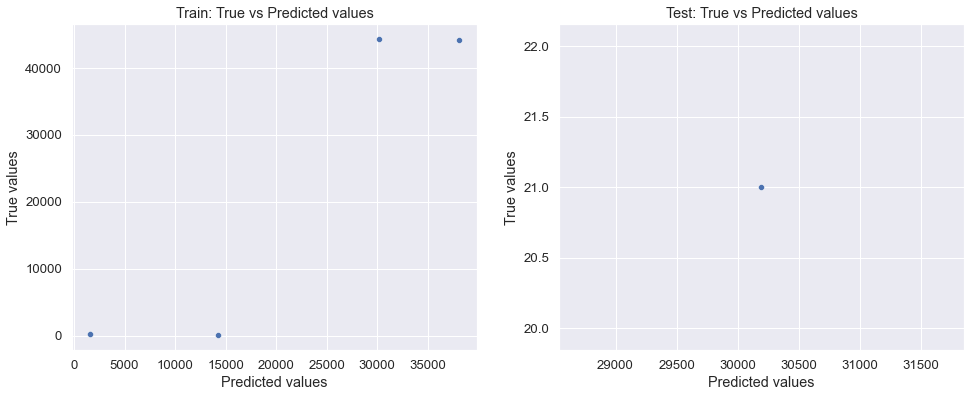

In [28]:
y_test = np.array(result['IC50'][100]).reshape(-1,1)[0]

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [29]:
y_test

array([21.])

In [30]:
y_test_preds

array([30194.385])

In [31]:
new = pd.read_csv('new_data.csv', sep=';', index_col='Molecule ChEMBL ID')
new.rename(columns = {'Standard Type':'Type', 'Standard Value': 'IC50'}, inplace=True)
new

,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Type,Standard Relation,IC50,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
Molecule ChEMBL ID,,,,,,,,,,,,,,,,,,,,,
CHEMBL354077,AMIFAMPRIDINE,4,109.13,0,0.25,"PYRIDINE-3,4-DIAMINE",Nc1ccncc1N,Inhibition,'=',5.40,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
CHEMBL128000,BUTEIN,0,272.26,0,2.41,BUTEIN,O=C(/C=C/c1ccc(O)c(O)c1)c1ccc(O)cc1O,Inhibition,'=',-4.59,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
CHEMBL98869,NaN,0,309.84,0,2.16,UAMC-00039,N[C@@H](CCNCc1ccc(Cl)cc1)C(=O)N1CCCCC1,Inhibition,'=',38.37,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
CHEMBL81421,(+)-ALPHA-TOCOPHERYL SUCCINATE,0,530.79,2,8.90,D-ALPHA-TOCOPHERYL SUCCINATE,Cc1c(C)c2c(c(C)c1OC(=O)CCC(=O)O)CC[C@@](C)(CCC...,Inhibition,'=',-1.40,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
CHEMBL1200895,PHENELZINE SULFATE,4,234.28,0,0.69,PHENELZINE SULFATE,NNCCc1ccccc1.O=S(=O)(O)O,Inhibition,'=',7.33,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL1567463,CHOLINE ALFOSCERATE,3,257.22,0,-1.45,SN-GLYCERO-3-PHOSPHOCHOLINE,C[N+](C)(C)CCOP(=O)([O-])OC[C@H](O)CO,Inhibition,'=',6.53,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4303101,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL3307519,NaN
CHEMBL2028019,CARIPRAZINE,4,427.42,0,4.34,cariprazine,CN(C)C(=O)N[C@H]1CC[C@H](CCN2CCN(c3cccc(Cl)c3C...,Inhibition,'=',-0.22,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4495565,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL4295411,NaN
CHEMBL1412853,NaN,0,287.34,0,2.16,ML130,Cc1ccc(S(=O)(=O)n2c(N)nc3ccccc32)cc1,Inhibition,'=',-0.19,...,SARS-CoV-2,Severe acute respiratory syndrome coronavirus 2,ORGANISM,CHEMBL4495565,52,SARS-CoV-2 Screening Data,NaN,2020.0,CHEMBL4295411,NaN


In [32]:
new_data = new[new['Type'] == 'IC50']

features = ['Smiles', 'IC50']
new_data = new_data[features]
new_data

,Smiles,IC50
Molecule ChEMBL ID,,
CHEMBL403183,Cc1ccc(S(=O)(=O)/C=C/C#N)cc1,10000.0
CHEMBL580580,Cc1cccc(Nc2nc(N)c3ccccc3n2)c1.Cl,30000.0
CHEMBL533999,CCC(=O)Nc1nnc(Cc2ccc(OC)c(OC)c2)s1,30000.0
CHEMBL529919,CCC(O)c1ccc(Br)cc1NC(=O)c1cccc(Cl)c1,30000.0
CHEMBL206540,CCOC(=O)c1cnc2ccc(CC)cc2c1O,1000.0
...,...,...
CHEMBL270299,CC(C)(C)c1ccc(S(=O)(=O)/C=C/C#N)cc1,840.0
CHEMBL1908308,CC[C@@]1([C@@H]2O[C@@H]([C@H]3O[C@@](O)(CO)[C@...,3180.0
CHEMBL2144958,c1ccc(-c2ccc(CNc3nc(-c4ccccn4)nnc3-c3ccccc3)cc...,31950.0


In [33]:
fst_df = result[features]
result_df = pd.concat([result,new_data], ignore_index=True)
result_df

,Smiles,IC50
0,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,7.0
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,44339.0
2,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,44258.0
3,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,260.5
4,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,290.0
...,...,...
5774,CC(C)(C)c1ccc(S(=O)(=O)/C=C/C#N)cc1,840.0
5775,CC[C@@]1([C@@H]2O[C@@H]([C@H]3O[C@@](O)(CO)[C@...,3180.0
5776,c1ccc(-c2ccc(CNc3nc(-c4ccccn4)nnc3-c3ccccc3)cc...,31950.0
5777,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)c1cccc(-c2ccccc...,1300.0


In [34]:
result_df.drop_duplicates(subset=['Smiles'],ignore_index=True, keep='first', inplace=True)

result_df.dropna(inplace=True)
result_df

,Smiles,IC50
0,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,7.0
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,44339.0
2,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,44258.0
3,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,260.5
4,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,290.0
...,...,...
3391,CCN1CCC(n2cc(CNc3cc(Cl)c4ncc(C#N)c(Nc5ccc(F)c(...,16640.0
3392,CC[C@@]1([C@@H]2O[C@@H]([C@H]3O[C@@](O)(CO)[C@...,3180.0
3393,c1ccc(-c2ccc(CNc3nc(-c4ccccn4)nnc3-c3ccccc3)cc...,31950.0
3394,CC(C)C[C@H](NC(=O)[C@@H](NC(=O)c1cccc(-c2ccccc...,1300.0


In [35]:


def FindSimilar(smiles):
    res = []
    mol = Chem.MolFromSmiles(smiles)
    smilesList = result_df['Smiles']
    fp_mol = FingerprintMols.FingerprintMol(mol)
    for smilesInDB in smilesList:
        mol_item = Chem.MolFromSmiles(smilesInDB)
        fp_item = FingerprintMols.FingerprintMol(mol_item)
        similarity = DataStructs.FingerprintSimilarity(fp_mol, fp_item)
        if similarity >= 0.9:
            res.append(smilesInDB)
    return res

result_df['Smiles'][1]

'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1'

In [36]:
data = FindSimilar(result_df['Smiles'][1])
data

['N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1',
 'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3c(F)cccc3F)CC2)cc1',
 'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3cc(F)ccc3F)CC2)cc1',
 'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccc(C(F)(F)F)cc3F)CC2)cc1',
 'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccc(F)cc3F)CC2)cc1',
 'N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3cccc(F)c3F)CC2)cc1']

In [37]:
toxic_db = get_chem_info(data)
toxic_db

,Smiles,MolLog,TPSA,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumRotatableBonds,CalcNumAmideBonds,NumHeteroatoms,...,NumSpiroAtoms,FractionCSP3,FpDensityMorgan1,ExactMolWt,Chi0,Chi1,Ipc,BertzCT,LabuteASA,IC50
0,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,4.07618,69.02,1,5,4,1,5,1,6,...,0,0.240000,1.064516,414.185590,21.631181,15.152198,1.508329e+07,1070.681061,180.708278,7.0
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3c(F)cccc3F)C...,4.21528,69.02,1,5,4,1,5,1,7,...,0,0.240000,1.031250,432.176168,22.501425,15.562882,2.147808e+07,1100.678895,184.873814,44339.0
2,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3cc(F)ccc3F)C...,4.21528,69.02,1,5,4,1,5,1,7,...,0,0.240000,1.093750,432.176168,22.501425,15.546045,2.153953e+07,1120.928895,184.873814,44258.0
3,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccc(C(F)(F)F...,5.09498,69.02,1,5,4,1,5,1,9,...,0,0.269231,1.085714,482.172974,25.001425,16.757370,6.731273e+07,1214.839463,199.569827,260.5
4,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccc(F)cc3F)C...,4.21528,69.02,1,5,4,1,5,1,7,...,0,0.240000,1.093750,432.176168,22.501425,15.546045,2.113405e+07,1120.928895,184.873814,290.0
5,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3cccc(F)c3F)C...,4.21528,69.02,1,5,4,1,5,1,7,...,0,0.240000,1.062500,432.176168,22.501425,15.562882,2.218880e+07,1120.928895,184.873814,60380.0


In [38]:
X_train = toxic_db.drop(['Smiles','IC50'], axis=1)
y_train = toxic_db['IC50']

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Train:	R2 = 0.79
Test:	R2 = nan


C:\Users\Lafavel\anaconda3\envs\diplom\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


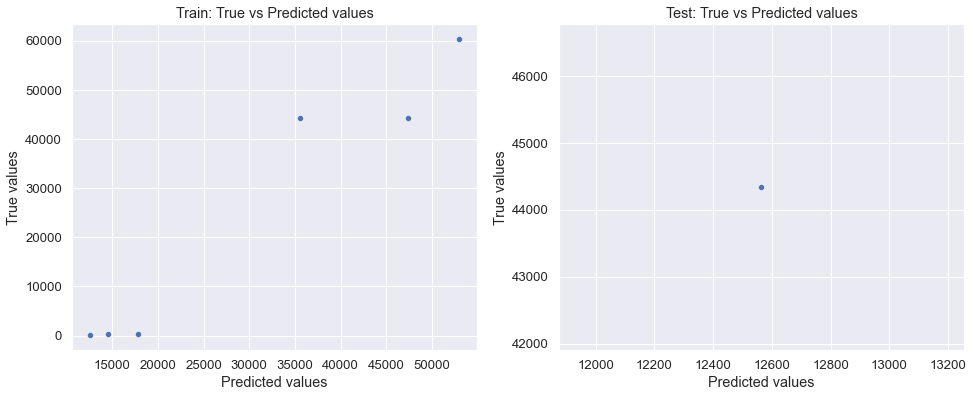

In [39]:
X_test = get_one_chem_info(result_df['Smiles'][1])
y_test = np.array(result_df['IC50'][1]).reshape(-1,1)[0]

y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [40]:
toxic_df = get_chem_info(result_df['Smiles'])
toxic_df.dropna(inplace=True)
toxic_df

,Smiles,MolLog,TPSA,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumRotatableBonds,CalcNumAmideBonds,NumHeteroatoms,...,NumSpiroAtoms,FractionCSP3,FpDensityMorgan1,ExactMolWt,Chi0,Chi1,Ipc,BertzCT,LabuteASA,IC50
0,CCN(CC)C(=O)N1CCC(NC(c2ccc(OC(C)C)cc2)c2cccnc2...,4.47400,57.70,1,6,4,1,8,2,6,...,0,0.520000,1.129032,424.283826,22.216968,15.011570,9.643864e+06,798.031521,186.156101,7.000
1,N#Cc1ccc(C(c2cccnc2)N2CCC(NC(=O)c3ccccc3F)CC2)cc1,4.07618,69.02,1,5,4,1,5,1,6,...,0,0.240000,1.064516,414.185590,21.631181,15.152198,1.508329e+07,1070.681061,180.708278,44339.000
2,CC(C)Oc1ccc(C(O)(c2cccnc2)c2ccccc2F)cc1,4.29210,42.35,1,3,3,1,5,0,4,...,0,0.190476,0.960000,337.147807,17.863597,12.013892,5.020377e+05,834.029603,146.298322,44258.000
3,Cc1cc(C(=O)NC2CCN(C(c3ccc(C#N)cc3)c3cccnc3)CC2...,2.97900,86.84,1,7,6,1,5,1,7,...,0,0.333333,1.193548,414.216809,21.794318,15.046045,1.525484e+07,1056.007355,181.879861,260.500
4,O=C(c1ccc(C(F)(F)F)cc1)N1CCC(NC(c2cnccn2)c2ccc...,4.75740,58.12,1,5,4,1,5,1,10,...,0,0.291667,1.029412,476.163552,24.294318,16.219365,4.003149e+07,1130.350296,192.197488,290.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,OCC1=CC=C(C(=C1)[N](=O)=O)[N](=O)=O,0.99530,106.51,1,7,5,1,3,0,7,...,0,0.142857,1.142857,198.027671,10.715178,6.557749,1.212532e+03,389.666586,77.896530,4.090
2529,CC(CC=C)\C=C(C)/C=O,2.34380,17.07,0,1,1,0,4,0,1,...,0,0.444444,1.700000,138.104465,7.983128,4.701907,1.335093e+02,144.807256,62.441104,3.080
2530,CCC(CO)C1=CC=CC=C1,2.17250,20.23,1,1,1,1,3,0,1,...,0,0.400000,1.272727,150.104465,8.104448,5.380540,4.005488e+02,189.287568,67.685405,2.890
2531,CC(C)(C)C(N)CO,0.35210,46.25,3,2,2,2,1,0,2,...,0,1.000000,1.500000,117.115364,6.784457,3.481380,3.564738e+01,65.419012,50.698086,2.282


In [41]:
values = toxic_df.drop(['Smiles','IC50'], axis=1)
target = toxic_df['IC50']

X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.10)

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

Train:	R2 = 0.89
Test:	R2 = 0.319


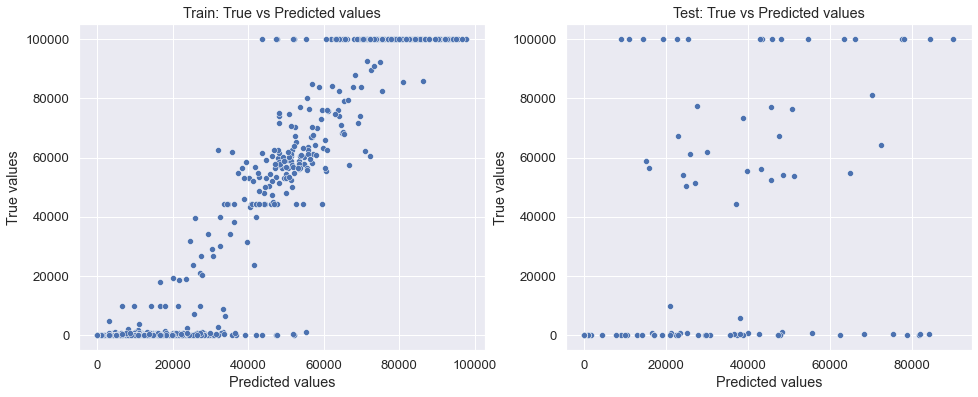

In [42]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [43]:
toxic_df.columns.values.tolist()

['Smiles',
 'MolLog',
 'TPSA',
 'NHOHCount',
 'NOCount',
 'NumHAcceptors',
 'NumHDonors',
 'NumRotatableBonds',
 'CalcNumAmideBonds',
 'NumHeteroatoms',
 'NumValenceElectrons',
 'NumSpiroAtoms',
 'FractionCSP3',
 'FpDensityMorgan1',
 'ExactMolWt',
 'Chi0',
 'Chi1',
 'Ipc',
 'BertzCT',
 'LabuteASA',
 'IC50']

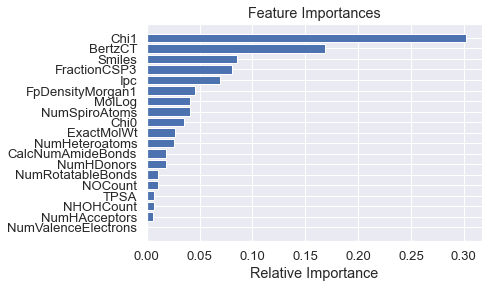

In [44]:
features = toxic_df.columns.values.tolist()
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Train:	R2 = 0.617
Test:	R2 = 0.434


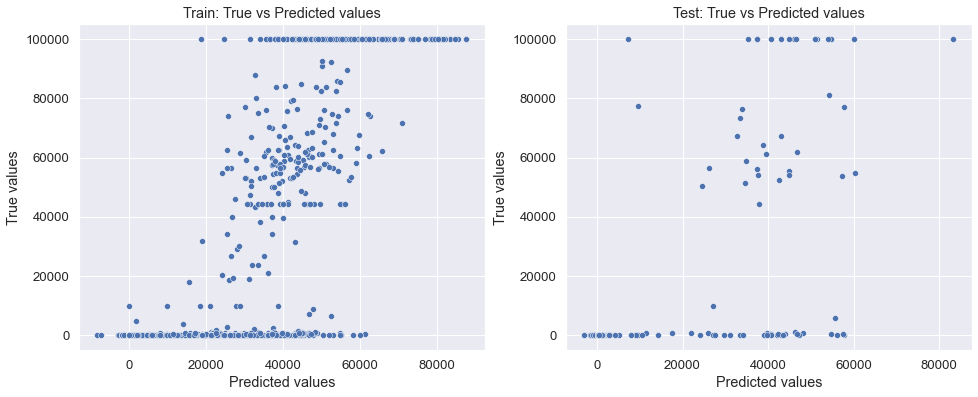

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor().fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [46]:
from sklearn.model_selection import KFold,GridSearchCV

params = {
    'n_estimators': [50,75,100,150],
    'min_samples_split': [2,3,4,5],
    'min_samples_leaf': [1,2,3,4,5],
    'max_depth': [1,2,3,4,5],
    'max_features': [3,4,6,10,15, 'log2', 'auto', 'sqrt'],
    'criterion': ['mse']
}
model = GradientBoostingRegressor()

model_grid = GridSearchCV(model, params, scoring='r2',
                         cv=KFold(n_splits=10, random_state=42, shuffle=True), n_jobs=-1)
model_grid.fit(values, target)
print(model_grid.best_params_)
print(model_grid.best_score_)

KeyboardInterrupt: 

In [ ]:
model = GradientBoostingRegressor(criterion='mse',max_depth=2, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200).fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [ ]:
toxic_df.to_csv('result_db.csv')

In [ ]:
def get_chem_info(smiles):
    toxic_db = pd.DataFrame()
    mols = [Chem.MolFromSmiles(s) for s in smiles] 
    
    toxic_db['Smiles'] = smiles
    toxic_db['MolLog'] = [Descriptors.MolLogP(m) for m in mols]
    toxic_db['TPSA'] = [Descriptors.TPSA(m) for m in mols]
    toxic_db['NHOHCount'] = [Descriptors.NHOHCount(m) for m in mols]
    toxic_db['NOCount'] = [Descriptors.NOCount(m) for m in mols]
    toxic_db['NumHAcceptors'] = [Descriptors.NumHAcceptors(m) for m in mols]
    toxic_db['NumHDonors'] = [Descriptors.NumHDonors(m) for m in mols]
    toxic_db['NumRotatableBonds'] = [Descriptors.NumRotatableBonds(m)  for m in mols]
    toxic_db['CalcNumAmideBonds'] = [Chem.rdMolDescriptors.CalcNumAmideBonds(m)  for m in mols]
    toxic_db['NumHeteroatoms'] = [Descriptors.NumHeteroatoms(m) for m in mols]
    toxic_db['NumValenceElectrons'] = [Descriptors.NumValenceElectrons(m) for m in mols]
    toxic_db['NumSpiroAtoms'] = [Chem.rdMolDescriptors.CalcNumSpiroAtoms(m) for m in mols]
    toxic_db['FractionCSP3'] = [Descriptors.FractionCSP3(m) for m in mols]
    toxic_db['FpDensityMorgan1'] = [Descriptors.FpDensityMorgan1(m) for m in mols]
    toxic_db['ExactMolWt'] = [Descriptors.ExactMolWt(m) for m in mols]
    toxic_db['Chi0'] = [Descriptors.Chi0(m) for m in mols]
    toxic_db['Chi1'] = [Descriptors.Chi1(m) for m in mols]
    toxic_db['Ipc'] = [Descriptors.Ipc(m) for m in mols]
    toxic_db['BertzCT'] = [Descriptors.BertzCT(m) for m in mols]
    toxic_db['LabuteASA'] = [Descriptors.LabuteASA(m) for m in mols]
    toxic_db['IC50'] = result['IC50']

                        
    return toxic_db

In [ ]:
toxic_df['Smiles'].to_list()

In [ ]:
result = get_chem_info(toxic_df['Smiles'].to_list())
result

In [ ]:
smile = toxic_df['Smiles'].to_list()[1]
smile

In [ ]:
Chem.rdchem.Compute2DCoords(Chem.MolFromSmiles(smile))

In [ ]:
result.to_csv('result_db.csv', index=False)

In [ ]:
from rdkit.Chem import Draw

Draw.MolToFile(Chem.MolFromSmiles(smile), '0.png')

In [ ]:
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import rdChemReactions as Reactions
from PIL import Image

#rxn = Reactions.ReactionFromSmarts(smile, useSmiles = True)

drawer = rdMolDraw2D.MolDraw2DCairo(800, 200)
drawer.SetFontSize(1.0)
drawer.DrawReaction(smile)
drawer.FinishDrawing()
bio = io.BytesIO()
text = drawer.GetDrawingText()

imtext = base64.b64encode(text).decode('utf8')

HTML(f"<div><img src='data:image/png;base64, {imtext}' alt='hoge'/></div>")

In [ ]:
smile = toxic_df['Smiles'].to_list()
mols = [Chem.MolFromSmiles(s) for s in smile] 

#for i in range(1,len(mols)):
 #   Draw.MolToFile(mols[i-1], f'{i}.png')

In [ ]:
Draw.MolToFile(mols[2532], f'{2533}.png')

In [ ]:
np.array(Chem.MolFromSmiles(smile[0]).ToBinary())

In [ ]:
Draw.MolToImage(mols[0])

In [ ]:
from sklearn import preprocessing as prep

values = prep.normalize(np.array(toxic_df.drop(['Smiles','IC50'], axis=1)))
target = toxic_df['IC50']

X_train, X_test, y_train, y_test = train_test_split(values, target, test_size=0.10)

In [ ]:
values

In [ ]:
norm_model = GradientBoostingRegressor()

params = {
    'n_estimators': [10,50,100,250],
    'max_depth': [1,3,5,7,10],
    'max_features': ['auto', 'sqrt','log2', 1,3,5,7,10,15,16,17,18]
}

model_grid = GridSearchCV(norm_model, params, scoring='r2',
                         cv=KFold(n_splits=10, random_state=42, shuffle=True), n_jobs=-1)
model_grid.fit(X_train, y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

In [ ]:
model = GradientBoostingRegressor(max_features=15, n_estimators=100, max_depth=1).fit(X_train, y_train)

y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [ ]:
model = GradientBoostingRegressor(criterion='mse',max_depth=2, max_features=1, min_samples_leaf=3, min_samples_split=4, n_estimators=250).fit(values, target)

In [ ]:
import pickle
pickle.dumps(model, 'gb_full_model.pkl')

In [ ]:
from joblib import dump, load
dump(model, 'gb_full_model.joblib')

In [ ]:
type(Chem.MolFromSmiles(smile))

In [ ]:
Chem.MolFromSmiles(smile[0]) == Chem.MolFromSmiles(smile[0])

In [ ]:
smile

In [ ]:
smile[0]

In [ ]:
m = Chem.MolFromSmiles(smile[0])
m

In [ ]:
f = FingerprintMols.FingerprintMol(m)
f

In [ ]:
DataStructs.FingerprintSimilarity(f, f)

In [ ]:
m2 = Chem.MolFromSmiles(smile[1])
m2

In [ ]:
f2 = FingerprintMols.FingerprintMol(m2)
f2

In [ ]:
DataStructs.FingerprintSimilarity(f, f2)

In [ ]:
tmp = []

for s in smile:
    m = Chem.MolFromSmiles(s)
    new_f = FingerprintMols.FingerprintMol(m)
    sim = DataStructs.FingerprintSimilarity(f, new_f)
    if sim == 1.0:
        tmp.append(s)
        
tmp[0]

In [ ]:
smile[0]

In [ ]:
str(f2)

In [ ]:
import rdkit

rdkit.DataStructs.cDataStructs.ExplicitBitVect(f2)

In [ ]:
values.info()

In [ ]:
model.predict(get_one_chem_info(smile[0]))[0]

In [ ]:
m = Chem.MolFromSmiles('CCC=OH')
m

In [ ]:
print(m)

In [ ]:
Chem.MolFromSmiles('CC')

In [57]:
from catboost import Pool, CatBoostRegressor

train_pool = Pool(X_train, 
                  y_train)

test_pool = Pool(X_train, 
                  y_train)

model = CatBoostRegressor(custom_metric='R2', loss_function='MAE').fit(train_pool)

0:	learn: 12208.2792425	total: 1.51ms	remaining: 1.51s
1:	learn: 12186.2193436	total: 2.94ms	remaining: 1.47s
2:	learn: 12160.6866905	total: 4.37ms	remaining: 1.45s
3:	learn: 12160.5964558	total: 5.73ms	remaining: 1.43s
4:	learn: 12158.0991442	total: 7.18ms	remaining: 1.43s
5:	learn: 12148.9465631	total: 8.55ms	remaining: 1.42s
6:	learn: 12138.4428282	total: 9.87ms	remaining: 1.4s
7:	learn: 12138.4331565	total: 11.2ms	remaining: 1.39s
8:	learn: 12131.4500024	total: 12.6ms	remaining: 1.38s
9:	learn: 12130.1383455	total: 13.5ms	remaining: 1.34s
10:	learn: 12130.1294766	total: 14.8ms	remaining: 1.33s
11:	learn: 12127.9384130	total: 16.1ms	remaining: 1.32s
12:	learn: 12120.0883271	total: 17.5ms	remaining: 1.33s
13:	learn: 12089.3242767	total: 18.9ms	remaining: 1.33s
14:	learn: 12089.1580216	total: 20.4ms	remaining: 1.34s
15:	learn: 12080.6116830	total: 21.9ms	remaining: 1.35s
16:	learn: 12071.2251725	total: 23.2ms	remaining: 1.34s
17:	learn: 12057.5717905	total: 24.5ms	remaining: 1.34s
18:

278:	learn: 10742.8818326	total: 351ms	remaining: 906ms
279:	learn: 10724.2681004	total: 352ms	remaining: 905ms
280:	learn: 10724.2672966	total: 353ms	remaining: 904ms
281:	learn: 10711.7861358	total: 355ms	remaining: 903ms
282:	learn: 10692.8448513	total: 356ms	remaining: 902ms
283:	learn: 10692.6426927	total: 357ms	remaining: 901ms
284:	learn: 10682.0410661	total: 359ms	remaining: 899ms
285:	learn: 10682.0395114	total: 360ms	remaining: 898ms
286:	learn: 10681.7776248	total: 361ms	remaining: 897ms
287:	learn: 10671.5527522	total: 362ms	remaining: 896ms
288:	learn: 10671.5513167	total: 364ms	remaining: 895ms
289:	learn: 10671.5127842	total: 365ms	remaining: 894ms
290:	learn: 10671.5122800	total: 367ms	remaining: 894ms
291:	learn: 10647.5059927	total: 368ms	remaining: 893ms
292:	learn: 10645.0070270	total: 370ms	remaining: 892ms
293:	learn: 10644.9892962	total: 371ms	remaining: 891ms
294:	learn: 10644.9855508	total: 372ms	remaining: 890ms
295:	learn: 10644.8301818	total: 373ms	remaining

564:	learn: 9610.6071549	total: 708ms	remaining: 545ms
565:	learn: 9594.6807041	total: 709ms	remaining: 544ms
566:	learn: 9594.5391038	total: 710ms	remaining: 542ms
567:	learn: 9592.8577001	total: 712ms	remaining: 541ms
568:	learn: 9592.3845921	total: 713ms	remaining: 540ms
569:	learn: 9589.6149506	total: 714ms	remaining: 539ms
570:	learn: 9589.6073036	total: 716ms	remaining: 538ms
571:	learn: 9589.1364273	total: 717ms	remaining: 536ms
572:	learn: 9589.0921001	total: 718ms	remaining: 535ms
573:	learn: 9588.6617127	total: 720ms	remaining: 534ms
574:	learn: 9578.2229232	total: 721ms	remaining: 533ms
575:	learn: 9578.2226403	total: 722ms	remaining: 532ms
576:	learn: 9575.4464494	total: 724ms	remaining: 531ms
577:	learn: 9575.4390984	total: 725ms	remaining: 529ms
578:	learn: 9571.7952351	total: 726ms	remaining: 528ms
579:	learn: 9547.3937132	total: 727ms	remaining: 527ms
580:	learn: 9546.4286523	total: 729ms	remaining: 525ms
581:	learn: 9544.7249496	total: 730ms	remaining: 524ms
582:	learn

848:	learn: 8895.3599164	total: 1.06s	remaining: 189ms
849:	learn: 8883.3279448	total: 1.06s	remaining: 188ms
850:	learn: 8883.2845474	total: 1.07s	remaining: 187ms
851:	learn: 8883.2693271	total: 1.07s	remaining: 185ms
852:	learn: 8883.2540896	total: 1.07s	remaining: 184ms
853:	learn: 8883.1150725	total: 1.07s	remaining: 183ms
854:	learn: 8883.1008543	total: 1.07s	remaining: 182ms
855:	learn: 8883.0855244	total: 1.07s	remaining: 180ms
856:	learn: 8862.2207061	total: 1.07s	remaining: 179ms
857:	learn: 8858.8572106	total: 1.07s	remaining: 178ms
858:	learn: 8858.8411508	total: 1.08s	remaining: 177ms
859:	learn: 8858.5521879	total: 1.08s	remaining: 175ms
860:	learn: 8858.4675380	total: 1.08s	remaining: 174ms
861:	learn: 8858.1377586	total: 1.08s	remaining: 173ms
862:	learn: 8858.1336562	total: 1.08s	remaining: 172ms
863:	learn: 8858.1229251	total: 1.08s	remaining: 170ms
864:	learn: 8843.6411287	total: 1.08s	remaining: 169ms
865:	learn: 8843.4408109	total: 1.08s	remaining: 168ms
866:	learn

In [58]:
y_train_preds = model.predict(train_pool)
y_test_preds = model.predict(test_pool)

model.get_best_score()

{'learn': {'MAE': 8595.988781578575, 'R2': 0.5441262250858399}}

In [50]:
model = CatBoostRegressor(custom_metric='R2', loss_function='MAE')

params = {
    'leaf_estimation_iterations': [1,5,10],
    'n_estimators': [50,100,250,500,1000,1500],
}

model_grid = GridSearchCV(model, params, scoring='r2',
                         cv=KFold(n_splits=10, random_state=42, shuffle=True), n_jobs=-1)
model_grid.fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

0:	learn: 12208.2792425	total: 2.31ms	remaining: 1.15s
1:	learn: 12186.2193436	total: 4.67ms	remaining: 1.16s
2:	learn: 12160.6866905	total: 6.78ms	remaining: 1.12s
3:	learn: 12160.5964558	total: 8.75ms	remaining: 1.08s
4:	learn: 12158.0991442	total: 10.6ms	remaining: 1.05s
5:	learn: 12148.9465631	total: 12.8ms	remaining: 1.05s
6:	learn: 12142.5942340	total: 15.2ms	remaining: 1.07s
7:	learn: 12142.5840710	total: 17.2ms	remaining: 1.05s
8:	learn: 12135.3038292	total: 19.3ms	remaining: 1.05s
9:	learn: 12134.0000307	total: 20.8ms	remaining: 1.02s
10:	learn: 12133.9913690	total: 22.6ms	remaining: 1s
11:	learn: 12131.8983593	total: 24.6ms	remaining: 1s
12:	learn: 12122.9126641	total: 26.4ms	remaining: 991ms
13:	learn: 12114.1812297	total: 28.3ms	remaining: 982ms
14:	learn: 12113.7918230	total: 30ms	remaining: 971ms
15:	learn: 12113.7850089	total: 31.9ms	remaining: 965ms
16:	learn: 12103.5999388	total: 33.7ms	remaining: 959ms
17:	learn: 12103.3735910	total: 35.8ms	remaining: 959ms
18:	learn:

189:	learn: 11204.2709734	total: 355ms	remaining: 579ms
190:	learn: 11190.1237992	total: 356ms	remaining: 577ms
191:	learn: 11184.1808056	total: 358ms	remaining: 575ms
192:	learn: 11184.1001213	total: 360ms	remaining: 573ms
193:	learn: 11183.8672191	total: 362ms	remaining: 571ms
194:	learn: 11183.8565034	total: 364ms	remaining: 570ms
195:	learn: 11183.8552445	total: 366ms	remaining: 568ms
196:	learn: 11183.7396659	total: 368ms	remaining: 566ms
197:	learn: 11163.7738341	total: 369ms	remaining: 563ms
198:	learn: 11163.7720346	total: 371ms	remaining: 562ms
199:	learn: 11162.6488733	total: 373ms	remaining: 560ms
200:	learn: 11162.4553152	total: 375ms	remaining: 558ms
201:	learn: 11162.0128386	total: 377ms	remaining: 556ms
202:	learn: 11152.9633604	total: 379ms	remaining: 554ms
203:	learn: 11152.5751192	total: 381ms	remaining: 552ms
204:	learn: 11152.5651311	total: 382ms	remaining: 550ms
205:	learn: 11143.4735434	total: 384ms	remaining: 548ms
206:	learn: 11142.8571251	total: 386ms	remaining

387:	learn: 10586.5426698	total: 717ms	remaining: 207ms
388:	learn: 10586.5424536	total: 719ms	remaining: 205ms
389:	learn: 10586.4044069	total: 721ms	remaining: 203ms
390:	learn: 10576.7675963	total: 723ms	remaining: 202ms
391:	learn: 10573.2067140	total: 725ms	remaining: 200ms
392:	learn: 10573.1869813	total: 726ms	remaining: 198ms
393:	learn: 10573.1515365	total: 728ms	remaining: 196ms
394:	learn: 10573.1213645	total: 730ms	remaining: 194ms
395:	learn: 10560.1507413	total: 732ms	remaining: 192ms
396:	learn: 10560.1104156	total: 734ms	remaining: 190ms
397:	learn: 10559.9517621	total: 735ms	remaining: 188ms
398:	learn: 10559.9514203	total: 737ms	remaining: 187ms
399:	learn: 10559.8765143	total: 739ms	remaining: 185ms
400:	learn: 10557.3149494	total: 740ms	remaining: 183ms
401:	learn: 10557.2372836	total: 742ms	remaining: 181ms
402:	learn: 10555.5712998	total: 744ms	remaining: 179ms
403:	learn: 10525.8516981	total: 746ms	remaining: 177ms
404:	learn: 10525.7301569	total: 748ms	remaining

In [55]:
model = CatBoostRegressor(leaf_estimation_iterations=10, n_estimators=500,custom_metric='R2', 
                          loss_function='MAE', random_seed=42)

model.fit(train_pool)
model.get_best_score()

0:	learn: 12232.9367194	total: 2.06ms	remaining: 1.03s
1:	learn: 12184.1284821	total: 4.18ms	remaining: 1.04s
2:	learn: 12151.9182935	total: 6.05ms	remaining: 1s
3:	learn: 12140.7921254	total: 7.9ms	remaining: 979ms
4:	learn: 12123.3597783	total: 9.74ms	remaining: 964ms
5:	learn: 12096.3283353	total: 11.7ms	remaining: 961ms
6:	learn: 12078.8400194	total: 13.8ms	remaining: 971ms
7:	learn: 12066.2922061	total: 15.6ms	remaining: 962ms
8:	learn: 12055.5216235	total: 17.7ms	remaining: 968ms
9:	learn: 12053.3495096	total: 19.8ms	remaining: 971ms
10:	learn: 12043.0430654	total: 21.7ms	remaining: 967ms
11:	learn: 12032.0709179	total: 23.6ms	remaining: 960ms
12:	learn: 12021.3813124	total: 25.6ms	remaining: 959ms
13:	learn: 12003.4224297	total: 27.4ms	remaining: 950ms
14:	learn: 11986.3350841	total: 29.3ms	remaining: 947ms
15:	learn: 11958.4356544	total: 31.1ms	remaining: 941ms
16:	learn: 11958.3560715	total: 32.8ms	remaining: 933ms
17:	learn: 11943.8400151	total: 34.6ms	remaining: 927ms
18:	le

202:	learn: 11219.1397716	total: 356ms	remaining: 521ms
203:	learn: 11218.6207115	total: 358ms	remaining: 519ms
204:	learn: 11211.4886624	total: 360ms	remaining: 518ms
205:	learn: 11205.3784996	total: 362ms	remaining: 516ms
206:	learn: 11202.6717812	total: 363ms	remaining: 514ms
207:	learn: 11195.8749185	total: 365ms	remaining: 512ms
208:	learn: 11193.8316194	total: 367ms	remaining: 511ms
209:	learn: 11193.7405155	total: 368ms	remaining: 509ms
210:	learn: 11192.0980189	total: 370ms	remaining: 507ms
211:	learn: 11189.2544733	total: 372ms	remaining: 506ms
212:	learn: 11187.9981939	total: 374ms	remaining: 504ms
213:	learn: 11182.1107782	total: 376ms	remaining: 502ms
214:	learn: 11181.6557101	total: 378ms	remaining: 501ms
215:	learn: 11180.5043498	total: 380ms	remaining: 499ms
216:	learn: 11179.4344087	total: 381ms	remaining: 497ms
217:	learn: 11174.6702875	total: 383ms	remaining: 496ms
218:	learn: 11173.7187946	total: 385ms	remaining: 494ms
219:	learn: 11165.2736859	total: 387ms	remaining

405:	learn: 10388.4668508	total: 717ms	remaining: 166ms
406:	learn: 10382.4964276	total: 719ms	remaining: 164ms
407:	learn: 10381.1015839	total: 720ms	remaining: 162ms
408:	learn: 10381.1006659	total: 722ms	remaining: 161ms
409:	learn: 10380.5721073	total: 724ms	remaining: 159ms
410:	learn: 10379.6003111	total: 726ms	remaining: 157ms
411:	learn: 10378.5338185	total: 727ms	remaining: 155ms
412:	learn: 10378.3455403	total: 729ms	remaining: 154ms
413:	learn: 10376.8273211	total: 731ms	remaining: 152ms
414:	learn: 10355.6656517	total: 732ms	remaining: 150ms
415:	learn: 10344.6426296	total: 734ms	remaining: 148ms
416:	learn: 10344.5741719	total: 736ms	remaining: 146ms
417:	learn: 10342.7395823	total: 738ms	remaining: 145ms
418:	learn: 10342.7261384	total: 739ms	remaining: 143ms
419:	learn: 10327.4210588	total: 741ms	remaining: 141ms
420:	learn: 10326.4756332	total: 743ms	remaining: 139ms
421:	learn: 10326.4653617	total: 744ms	remaining: 138ms
422:	learn: 10320.7964257	total: 746ms	remaining

{'learn': {'MAE': 10031.643086274116, 'R2': 0.44870097682366883}}

In [51]:
model = CatBoostRegressor(task_type='GPU', learning_rate=0.0001, custom_metric='R2', loss_function='MAE').fit(train_pool)

Metric R2 is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	learn: 12280.7046950	total: 18.2ms	remaining: 18.2s
1:	learn: 12280.7038175	total: 29.9ms	remaining: 14.9s
2:	learn: 12280.7038175	total: 41.3ms	remaining: 13.7s
3:	learn: 12280.7038175	total: 52.6ms	remaining: 13.1s
4:	learn: 12280.7038175	total: 63.6ms	remaining: 12.7s
5:	learn: 12280.7038175	total: 74.6ms	remaining: 12.4s
6:	learn: 12280.7038175	total: 85.5ms	remaining: 12.1s
7:	learn: 12280.7038175	total: 96.4ms	remaining: 11.9s
8:	learn: 12280.7038175	total: 107ms	remaining: 11.8s
9:	learn: 12280.7038175	total: 118ms	remaining: 11.7s
10:	learn: 12280.7038175	total: 129ms	remaining: 11.6s
11:	learn: 12280.7038175	total: 140ms	remaining: 11.5s
12:	learn: 12280.7038175	total: 151ms	remaining: 11.5s
13:	learn: 12280.7038175	total: 162ms	remaining: 11.4s
14:	learn: 12280.7038175	total: 173ms	remaining: 11.3s
15:	learn: 12280.7038175	total: 184ms	remaining: 11.3s
16:	learn: 12280.7038175	total: 195ms	remaining: 11.2s
17:	learn: 12280.7029399	total: 205ms	remaining: 11.2s
18:	learn: 1

166:	learn: 12280.6994296	total: 1.74s	remaining: 8.67s
167:	learn: 12280.6994296	total: 1.75s	remaining: 8.66s
168:	learn: 12280.6985520	total: 1.76s	remaining: 8.66s
169:	learn: 12280.6985520	total: 1.77s	remaining: 8.64s
170:	learn: 12280.6985520	total: 1.78s	remaining: 8.64s
171:	learn: 12280.6985520	total: 1.79s	remaining: 8.62s
172:	learn: 12280.6985520	total: 1.8s	remaining: 8.61s
173:	learn: 12280.6985520	total: 1.81s	remaining: 8.61s
174:	learn: 12280.6985520	total: 1.82s	remaining: 8.59s
175:	learn: 12280.6985520	total: 1.83s	remaining: 8.58s
176:	learn: 12280.6985520	total: 1.84s	remaining: 8.57s
177:	learn: 12280.6985520	total: 1.85s	remaining: 8.56s
178:	learn: 12280.6985520	total: 1.86s	remaining: 8.55s
179:	learn: 12280.6985520	total: 1.87s	remaining: 8.54s
180:	learn: 12280.6985520	total: 1.88s	remaining: 8.53s
181:	learn: 12280.6985520	total: 1.89s	remaining: 8.51s
182:	learn: 12280.6985520	total: 1.9s	remaining: 8.5s
183:	learn: 12280.6985520	total: 1.91s	remaining: 8

318:	learn: 12280.6941641	total: 3.31s	remaining: 7.07s
319:	learn: 12280.6941641	total: 3.32s	remaining: 7.06s
320:	learn: 12280.6950417	total: 3.33s	remaining: 7.04s
321:	learn: 12280.6941641	total: 3.34s	remaining: 7.03s
322:	learn: 12280.6950417	total: 3.35s	remaining: 7.02s
323:	learn: 12280.6941641	total: 3.36s	remaining: 7.01s
324:	learn: 12280.6941641	total: 3.37s	remaining: 7s
325:	learn: 12280.6950417	total: 3.38s	remaining: 6.99s
326:	learn: 12280.6950417	total: 3.39s	remaining: 6.98s
327:	learn: 12280.6941641	total: 3.4s	remaining: 6.97s
328:	learn: 12280.6941641	total: 3.41s	remaining: 6.96s
329:	learn: 12280.6941641	total: 3.42s	remaining: 6.95s
330:	learn: 12280.6941641	total: 3.43s	remaining: 6.94s
331:	learn: 12280.6941641	total: 3.44s	remaining: 6.93s
332:	learn: 12280.6941641	total: 3.45s	remaining: 6.92s
333:	learn: 12280.6941641	total: 3.46s	remaining: 6.9s
334:	learn: 12280.6932865	total: 3.47s	remaining: 6.89s
335:	learn: 12280.6932865	total: 3.48s	remaining: 6.8

471:	learn: 12280.6897762	total: 4.85s	remaining: 5.43s
472:	learn: 12280.6897762	total: 4.87s	remaining: 5.42s
473:	learn: 12280.6888986	total: 4.88s	remaining: 5.41s
474:	learn: 12280.6888986	total: 4.88s	remaining: 5.4s
475:	learn: 12280.6897762	total: 4.89s	remaining: 5.39s
476:	learn: 12280.6888986	total: 4.91s	remaining: 5.38s
477:	learn: 12280.6888986	total: 4.92s	remaining: 5.37s
478:	learn: 12280.6888986	total: 4.93s	remaining: 5.36s
479:	learn: 12280.6888986	total: 4.94s	remaining: 5.35s
480:	learn: 12280.6888986	total: 4.95s	remaining: 5.34s
481:	learn: 12280.6888986	total: 4.96s	remaining: 5.33s
482:	learn: 12280.6888986	total: 4.97s	remaining: 5.32s
483:	learn: 12280.6888986	total: 4.98s	remaining: 5.31s
484:	learn: 12280.6888986	total: 4.99s	remaining: 5.3s
485:	learn: 12280.6888986	total: 5s	remaining: 5.29s
486:	learn: 12280.6888986	total: 5.01s	remaining: 5.28s
487:	learn: 12280.6888986	total: 5.02s	remaining: 5.26s
488:	learn: 12280.6888986	total: 5.03s	remaining: 5.2

625:	learn: 12280.6845108	total: 6.41s	remaining: 3.83s
626:	learn: 12280.6845108	total: 6.42s	remaining: 3.82s
627:	learn: 12280.6845108	total: 6.43s	remaining: 3.81s
628:	learn: 12280.6845108	total: 6.45s	remaining: 3.8s
629:	learn: 12280.6845108	total: 6.46s	remaining: 3.79s
630:	learn: 12280.6845108	total: 6.46s	remaining: 3.78s
631:	learn: 12280.6845108	total: 6.47s	remaining: 3.77s
632:	learn: 12280.6845108	total: 6.49s	remaining: 3.76s
633:	learn: 12280.6845108	total: 6.5s	remaining: 3.75s
634:	learn: 12280.6845108	total: 6.5s	remaining: 3.74s
635:	learn: 12280.6845108	total: 6.52s	remaining: 3.73s
636:	learn: 12280.6845108	total: 6.53s	remaining: 3.72s
637:	learn: 12280.6845108	total: 6.54s	remaining: 3.71s
638:	learn: 12280.6845108	total: 6.55s	remaining: 3.7s
639:	learn: 12280.6845108	total: 6.56s	remaining: 3.69s
640:	learn: 12280.6845108	total: 6.57s	remaining: 3.68s
641:	learn: 12280.6845108	total: 6.58s	remaining: 3.67s
642:	learn: 12280.6845108	total: 6.59s	remaining: 3.

779:	learn: 12280.6801229	total: 7.97s	remaining: 2.25s
780:	learn: 12280.6801229	total: 7.98s	remaining: 2.24s
781:	learn: 12280.6801229	total: 7.99s	remaining: 2.23s
782:	learn: 12280.6801229	total: 8s	remaining: 2.22s
783:	learn: 12280.6801229	total: 8.01s	remaining: 2.21s
784:	learn: 12280.6801229	total: 8.02s	remaining: 2.2s
785:	learn: 12280.6801229	total: 8.03s	remaining: 2.19s
786:	learn: 12280.6801229	total: 8.04s	remaining: 2.18s
787:	learn: 12280.6801229	total: 8.06s	remaining: 2.17s
788:	learn: 12280.6801229	total: 8.07s	remaining: 2.16s
789:	learn: 12280.6801229	total: 8.08s	remaining: 2.15s
790:	learn: 12280.6801229	total: 8.09s	remaining: 2.14s
791:	learn: 12280.6801229	total: 8.1s	remaining: 2.13s
792:	learn: 12280.6801229	total: 8.11s	remaining: 2.12s
793:	learn: 12280.6801229	total: 8.12s	remaining: 2.11s
794:	learn: 12280.6801229	total: 8.13s	remaining: 2.1s
795:	learn: 12280.6801229	total: 8.14s	remaining: 2.09s
796:	learn: 12280.6792453	total: 8.15s	remaining: 2.08

928:	learn: 12280.6748574	total: 9.51s	remaining: 727ms
929:	learn: 12280.6748574	total: 9.52s	remaining: 716ms
930:	learn: 12280.6748574	total: 9.53s	remaining: 706ms
931:	learn: 12280.6748574	total: 9.54s	remaining: 696ms
932:	learn: 12280.6748574	total: 9.55s	remaining: 686ms
933:	learn: 12280.6748574	total: 9.56s	remaining: 675ms
934:	learn: 12280.6739798	total: 9.57s	remaining: 665ms
935:	learn: 12280.6739798	total: 9.58s	remaining: 655ms
936:	learn: 12280.6748574	total: 9.59s	remaining: 645ms
937:	learn: 12280.6739798	total: 9.6s	remaining: 634ms
938:	learn: 12280.6739798	total: 9.61s	remaining: 624ms
939:	learn: 12280.6739798	total: 9.62s	remaining: 614ms
940:	learn: 12280.6739798	total: 9.63s	remaining: 604ms
941:	learn: 12280.6739798	total: 9.64s	remaining: 594ms
942:	learn: 12280.6739798	total: 9.65s	remaining: 583ms
943:	learn: 12280.6748574	total: 9.66s	remaining: 573ms
944:	learn: 12280.6739798	total: 9.67s	remaining: 563ms
945:	learn: 12280.6739798	total: 9.68s	remaining:

In [52]:
model.get_best_score()

{'learn': {'MAE': 12280.672224659938, 'R2': -0.167703198925911}}

In [53]:
model.get_params()

{'learning_rate': 0.0001,
 'loss_function': 'MAE',
 'custom_metric': 'R2',
 'task_type': 'GPU'}

In [ ]:
model.evals_result_

Train:	R2 = 0.544
Test:	R2 = 0.44


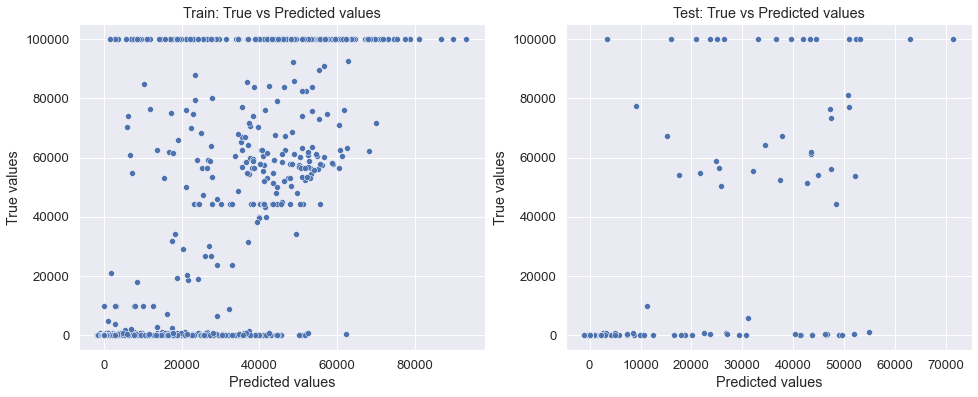

In [59]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)